# Looping Graph

In [1]:
from IPython.display import Image,display
from typing import TypedDict, List
from langgraph.graph import StateGraph,START,END
import random


In [2]:
class AgentState(TypedDict):
    name:str
    number:list[int]
    counter:int

In [ ]:
def greeting_node(state:AgentState)->AgentState:
    """Greeting Node which says hi to the person"""
    state['name'] = f"Hi there, {state['name']}"
    state['counter'] = 0

    return state


def randomn_node(state:AgentState)-> AgentState:
    """This function generates randomn numbers from 0 to 10"""
    state['number'].append(random.randint(0,10))
    state['counter']+=1

    return state

def should_continue(state:AgentState)->AgentState:
    """Function to decide what to do next"""
    if state['counter'] < 5:
        print(f'entering loop {state["counter"]}')
        return 'loop' # loop egde
    else:
        return 'exit' # exit edge

In [15]:
graph = StateGraph(AgentState)

graph.set_entry_point("greeting")
graph.add_node("greeting",greeting_node)
graph.add_edge("greeting","random")
graph.add_node("random",randomn_node)
graph.add_conditional_edges(
    "random",
    should_continue,
    {'loop':"random",
    'exit':END}
)

app = graph.compile()



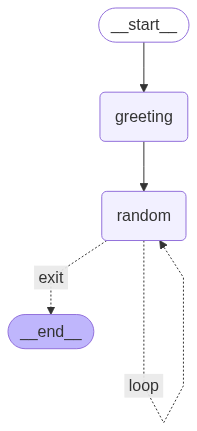

In [12]:
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
test = AgentState(name="Siya",number=[],counter=-1)
app.invoke(test)

entering loop 0
entering loop 1
entering loop 2
entering loop 3
entering loop 4


{'name': 'Hi there, Siya', 'number': [8, 4, 6, 2, 0, 6], 'counter': 5}

# Excercise

In [2]:
class AgentState(TypedDict):
    Player_name:str
    guesses:list[int]
    attempts:int
    lower_bound:int
    upper_bound:int
    target:int
    guess:int
    hint:str

In [17]:
def setup_node(state:AgentState)-> AgentState:
    """This function create the initial variable need for the game"""
    state['target'] = random.randint(state['lower_bound'],state['upper_bound'])
    state['guesses'] = []
    state['attempts'] = 0
    state['Player_name'] = f"Hi {state['Player_name']}"
    return state

def guess_node(state:AgentState)->AgentState:
    """This function makes the guess"""
    state['guess'] = random.randint(state['lower_bound'],state['upper_bound'])
    state['guesses'].append(state['guess'])
    state['attempts']+=1
    print(state['guess'])
    print('guess made')
    return state

def hint_node(state:AgentState)->AgentState:
    """This function gives the hint wheter the guess is hihger or lower"""
    if state['guess'] == state['target']:
        state['hint'] = 'Correct'

    elif state['guess'] > state['target']:
        state['upper_bound'] = state['guess']
        state['hint'] = 're-try'
    
    else:
        state['lower_bound'] = state['guess']
        state['hint'] = 're-try'

    return state
    

def should_continue(state:AgentState)->AgentState:
    """This check whether to stop or continue"""
    if state['attempts'] == 7:
        print("max attempts stop")
        return 'end'
    elif state['hint'] == 'Correct':
        return 'end'
    else:
        print("re trying")
        return 'continue'
    

In [18]:
graph = StateGraph(AgentState)

graph.set_entry_point("setup")
graph.add_node('setup',setup_node)
graph.add_edge('setup','play')
graph.add_node('play',guess_node)
graph.add_edge('play','hint_node')
graph.add_node('hint_node',hint_node)
graph.add_conditional_edges(
    'hint_node',
    should_continue,
    {
        #EGDE:NODE
        'end':END,
        'continue':"play"
    }
)

app = graph.compile()

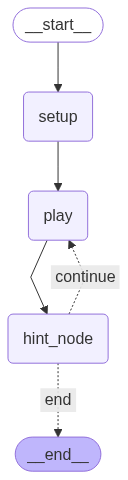

In [6]:
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
test = AgentState(Player_name='Siya',guesses=[],attempts=0,lower_bound=1,upper_bound=20)

app.invoke(test)

18
guess made
re trying
14
guess made
re trying
6
guess made
re trying
11
guess made
re trying
8
guess made


{'Player_name': 'Hi Siya',
 'guesses': [18, 14, 6, 11, 8],
 'attempts': 5,
 'lower_bound': 6,
 'upper_bound': 11,
 'target': 8,
 'guess': 8,
 'hint': 'Correct'}